In [1]:
from pathlib import Path
import xarray as xr
import numpy as np

In [2]:
# original data
dir1 = Path(
    "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/bias_corrected"
)
# new data
dir2 = Path(
    "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_legacy/bias_corrected"
)


def find_files(dir1, dir2, filename):
    dir1_files = list(dir1.rglob(filename))
    dir2_files = list(dir2.rglob(filename))

    if len(dir1_files) == 0 and len(dir2_files) == 0:
        return None, None
    if len(dir1_files) > 1 and len(dir2_files) > 1:
        return None, None
    if len(dir1_files) == 1 and len(dir2_files) == 1:
        print(f"Found 1 file in {dir1} \nFound 1 file in {dir2}")

    return dir1_files[0], dir2_files[0]


def compare_files(dir1, dir2, filename):
    file1, file2 = find_files(dir1, dir2, filename)
    if file1 is None or file2 is None:
        print("One or both files not found. Cannot compare.")
        return None
    print(f"Comparing {file1} and {file2}")

    ds1 = xr.open_dataset(file1)
    ds2 = xr.open_dataset(file2)

    # Align coordinates to ensure they match exactly (dtype and values)
    # This is necessary when coordinates have same values but different dtypes
    ds2 = ds2.assign_coords({"lat": ds1["lat"], "lon": ds1["lon"], "time": ds1["time"]})

    ds_diff = ds1 - ds2
    # print("Difference between datasets:")
    # print(ds_diff)

    return ds1, ds2, ds_diff

In [3]:
fn = "pr_EC-Earth3-Veg_2093.nc"
ds1, ds2, ds_diff = compare_files(dir1, dir2, fn)

Found 1 file in /import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/bias_corrected 
Found 1 file in /import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_legacy/bias_corrected
Comparing /import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/bias_corrected/bias_corrected/pr_EC-Earth3-Veg_2093.nc and /import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_legacy/bias_corrected/EC-Earth3-Veg/pr_EC-Earth3-Veg_2093.nc


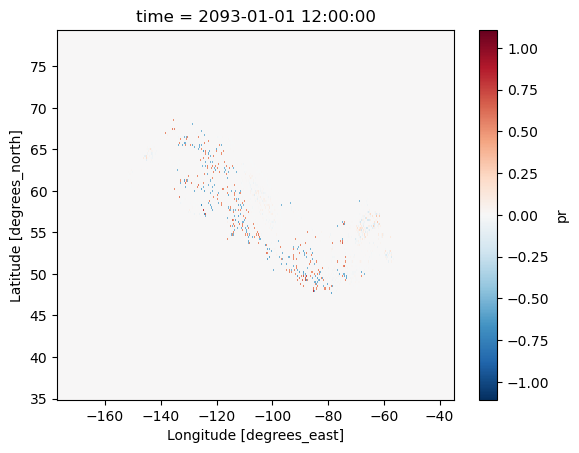

In [4]:
# Plot the difference
ds_diff["pr"].isel(time=0).plot()

In [5]:
# Summary statistics of the difference
print(f"Max absolute difference: {np.abs(ds_diff['pr']).max().values:.6f} mm/d")
print(f"Mean absolute difference: {np.abs(ds_diff['pr']).mean().values:.6f} mm/d")
print(f"Number of non-zero differences: {(ds_diff['pr'] != 0).sum().values}")
print(f"Total number of valid points: {np.isfinite(ds_diff['pr']).sum().values}")

Max absolute difference: 6.988804 mm/d
Mean absolute difference: 0.003665 mm/d
Number of non-zero differences: 1553696
Total number of valid points: 36967930
